In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()

In [4]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


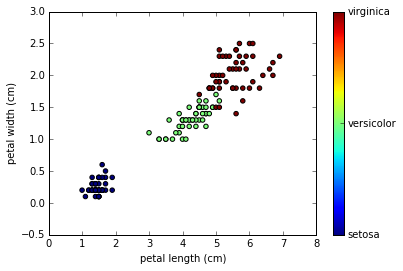

In [12]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

#### sklearn estimator object

In [14]:
# every algorithm is exposed in sklearn via an 'estimator' object
from sklearn.linear_model import LinearRegression

In [15]:
# all parameters of an estimator can be set when it is instiantiated
lm_fit = LinearRegression(normalize = True)


In [16]:
print lm_fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [17]:
# when data is fit with an estimator, parameters are estimated
# from the data at hand. all estimated parameters are attributes
# of the estimator object ending with an underscore
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

(-0.5, 2.5)

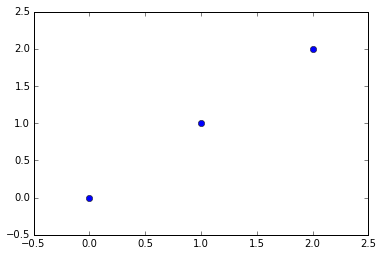

In [19]:
plt.plot(x, y, 'o')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

In [20]:
# the input data for sklearn is 2D
# samples = 3 x features = 1
X = x[:, np.newaxis]
print X

[[0]
 [1]
 [2]]


In [21]:
print y

[0 1 2]


In [22]:
lm_fit.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [24]:
print lm_fit.coef_

[ 1.]


In [25]:
print lm_fit.intercept_

1.11022302463e-16


In [26]:
print lm_fit.residues_

1.23259516441e-32


In [28]:
dir(lm_fit)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_center_data',
 '_get_param_names',
 '_set_intercept',
 'coef_',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'residues_',
 'score',
 'set_params',
 'singular_']

#### k nearest neighbours

In [29]:
from sklearn import neighbors

In [30]:
X, y = iris.data, iris.target

In [31]:
# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)

In [32]:
# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [33]:
# what kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the predict method
result = knn.predict([[3, 5, 4, 2], ])

In [34]:
print iris.target_names[result]

['virginica']


#### using SVC


In [35]:
from sklearn.svm import SVC

In [36]:
svc_mod = SVC()

In [37]:
svc_mod.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
result = svc_mod.predict([[3, 5, 4, 2], ])

In [40]:
print iris.target_names[result]

['virginica']


#### a regression example

In [41]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

In [42]:
# fit linear regression
lm = LinearRegression(fit_intercept = True)

In [43]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
lm.coef_

array([ 3.93491126])

In [46]:
lm.intercept_

1.4622907890393391

In [49]:
# create predictions with data from 1 - 100
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = lm.predict(X_test)

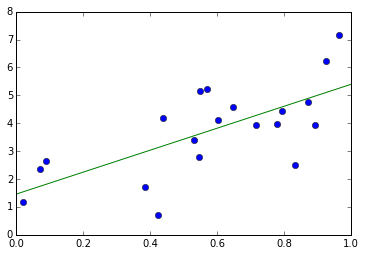

In [51]:
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test)

#### Unsupervised Learning

In [52]:
# Dimensionality reduction: PCA
X, y = iris.data, iris.target

In [54]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components = 2)

In [57]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [59]:
X_reduced = pca.transform(X)

In [61]:
# the shape is as indicated in n_components
X_reduced.shape

(150, 2)

In [62]:
import pylab as pl

Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
-0.657 x sepal length (cm) + -0.730 x sepal width (cm) + 0.176 x petal length (cm) + 0.075 x petal width (cm)


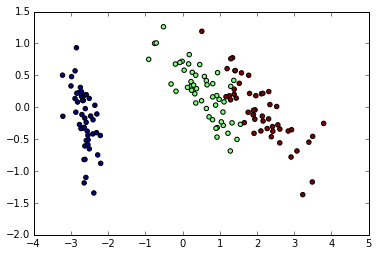

In [64]:
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)

print "Meaning of the 2 components:"
for component in pca.components_:
    print " + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names))

#### Clustering: k-means

In [65]:
from sklearn.cluster import KMeans

In [66]:
k_means = KMeans(n_clusters = 3, random_state = 0)

In [67]:
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [68]:
y_pred = k_means.predict(X)

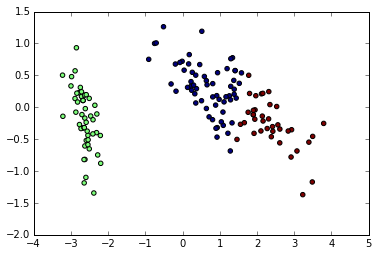

In [69]:
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y_pred)